In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
import numpy as np
X=2*np.random.rand(100,2)
# Original features
X1 = X[:, 0]
X2 = X[:, 1]

# Expanded feature matrix to include polynomial terms
X_poly = np.hstack([
    X1.reshape(-1, 1),         # X1
    X2.reshape(-1, 1),         # X2
    (X1**2).reshape(-1, 1),    # X1^2
    (X2**2).reshape(-1, 1),    # X2^2
    (X1 * X2).reshape(-1, 1),  # X1 * X2
    np.ones((X.shape[0], 1))   # Bias term (1s)
])


In [96]:
def predict(W, X_poly):
    return np.dot(X_poly, W)


In [97]:
def MSE(W, X_poly, Y):
    Y_pred = predict(W, X_poly)
    return np.mean((Y_pred - Y)**2)


In [98]:
def descent_gradient(X_poly, Y, W, epochs, learning_rate):
    history = []
    
    for epoch in range(epochs):
        Y_pred = predict(W, X_poly)
        gradient = (2/X_poly.shape[0]) * np.dot(X_poly.T, (Y_pred - Y))
        W -= learning_rate * gradient
        history.append(MSE(W, X_poly, Y))
    
    return W, history


In [99]:
# Initialize weights (6 features: X1, X2, X1^2, X2^2, X1*X2, bias)
W = np.random.randn(X_poly.shape[1], 1)

# Run gradient descent
epochs = 1000
learning_rate = 1e-3
W, history = descent_gradient(X_poly, Y, W, epochs, learning_rate)


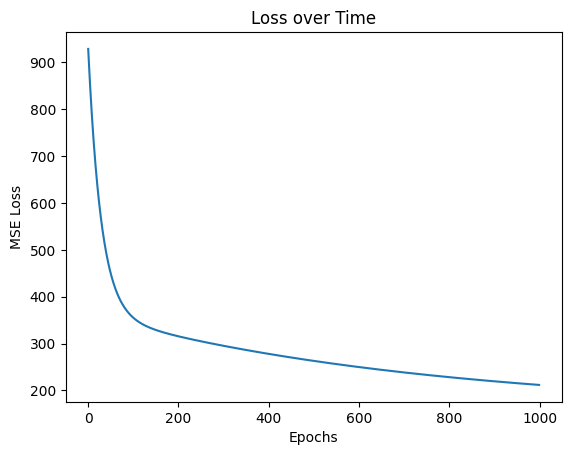

In [100]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss over Time')
plt.show()


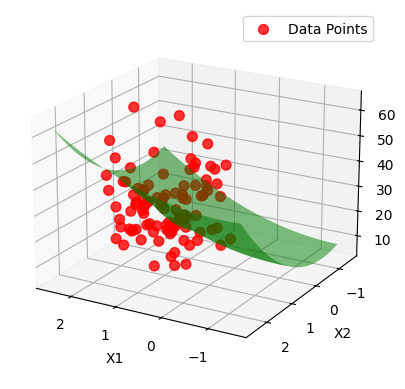

In [106]:
# Create a meshgrid for X1 and X2
X1_grid, X2_grid = np.meshgrid(np.linspace(-1.5, 2.5, 20), np.linspace(-1.5, 2.5, 20))

# Calculate the corresponding Y values for the plane
Y_pred_plane = W[0] * X1_grid + W[1] * X2_grid + W[2] * X1_grid**2 + W[3] * X2_grid**2 + W[4] * X1_grid * X2_grid + W[5]

# Ensure unique data points
X12 = X[:, :2]
unique_data = np.unique(np.hstack((X12, Y.reshape(-1, 1))), axis=0)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot unique data points
ax.scatter(unique_data[:, 0], unique_data[:, 1], unique_data[:, 2], s=50, alpha=0.8, c='red', label='Data Points')

# Plot the best-fit plane
ax.plot_surface(X1_grid, X2_grid, Y_pred_plane, color='green', alpha=0.5, rstride=10, cstride=10)

# Rotate the plot for better visualization
ax.view_init(elev=20, azim=120)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Add a legend
ax.legend()

# Show plot
plt.show()
